In [1]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.dates as dates
COLUMNS = ['timeStamp','elapsed','label','responseCode','responseMessage','threadName','dataType','success','bytes','sentBytes']

In [2]:
def convertDateTime (timeSTP):
    datahora = datetime.fromtimestamp(float(timeSTP[:-3])).isoformat()
    datahora = re.sub('T', ' ' , datahora)
    return datetime.strptime(datahora[:-3], '%Y-%m-%d %H:%M')
    

def convertthreadName(threadName):
    result = re.sub('jp@gc\D+\s', '' , threadName)
    return result

def converttosecond(elapsed):
    result = int(elapsed)
    result /= 1000
    return result

def converttoint(val):
    result = int(val)
    return result

def convertBoolean(success):
    result = eval('True')
    return result

def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = 'percentile'.format(n)
    return _percentile

In [3]:
jmeterlog = pd.read_csv('ALELOAUTO_1002_BAT1_20190210_0000.jtl',
                   sep=',',
                   engine='python', 
                       na_values='-', 
                   header=None ,
                   names=COLUMNS,
                   converters={'timeStamp': convertDateTime,
                              'threadName': convertthreadName,
                              'elapsed': converttosecond,
                              'success': convertBoolean,
                              'responseCode': converttoint
                              }
                       )


# Detalhe do Comportamento da Bateria de Teste

### Na linha de tempo, como foi tempo de resposta da aplicação?

In [4]:
resquestsucess = jmeterlog.loc[(jmeterlog['responseCode'] == 200) & (jmeterlog['success'] == True)]

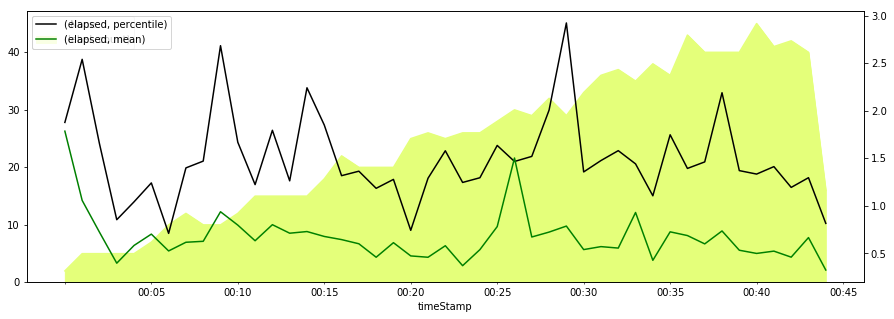

In [5]:
gp_Pct = resquestsucess.groupby(['timeStamp']).agg({    
    'elapsed': [percentile(90), 'mean'],
    'label': ['count']
})
gp_Pct[('label','count')].plot.area(figsize=(15, 5), colormap='Wistia').legend(loc='upper left')
gp_Pct[('elapsed','percentile')].plot(figsize=(15, 5),secondary_y=True, colormap='copper').legend(loc='upper left')
gp_Pct[('elapsed','mean')].plot(figsize=(15, 5),secondary_y=True, colormap='ocean').legend(loc='upper left')

plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d/%m/%Y %H:%M'))
plt.xticks(size='small',rotation=45, ha="right")
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(byminute=None, interval=20))

### Percentil de Tempo de Resposta

#### Percentil de tempo de resposta por URI.

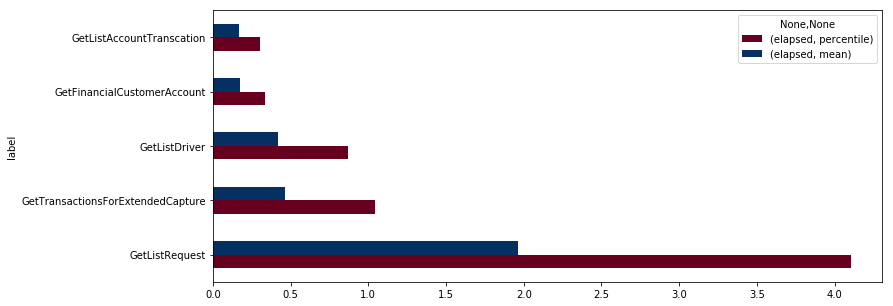

In [6]:
gp_PctLabel = resquestsucess.groupby(['label']).agg({    
    'elapsed': [percentile(90), 'mean']
})
gp_PctLabel =  gp_PctLabel.sort_values(by=[('elapsed', 'percentile')],ascending=False)
gp_PctLabel.plot.barh(figsize=(12, 5), stacked=False, colormap='RdBu');
#prism

### Proporção de Response Code

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B25BE8B438>],
      dtype=object)

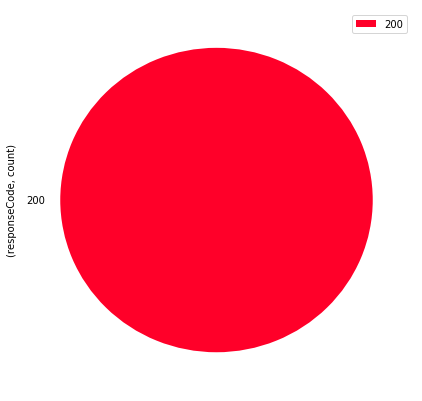

In [13]:
percetResponseCode = jmeterlog.groupby(['responseCode']).agg({    
    'responseCode': ['count']
})
percetResponseCode.plot.pie(subplots=True, figsize=(7, 7), colormap='gist_rainbow')

In [8]:
gp_PctLabel = resquestsucess.groupby(['timeStamp','label']).agg({    
    'elapsed': [percentile(90)]
})

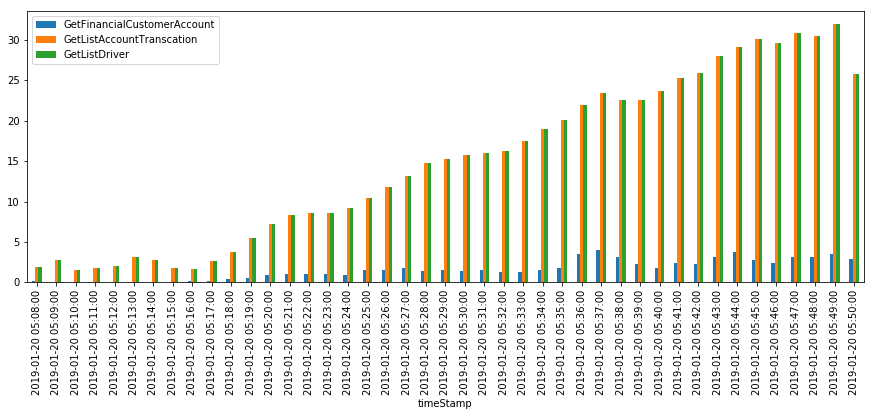

In [9]:
gp_PctLabel = gp_PctLabel.reset_index()
gp_PctLabel = gp_PctLabel.set_index('timeStamp')

filtro1 = gp_PctLabel.loc[(gp_PctLabel['label'] == 'GetFinancialCustomerAccount') ]
df_metricas = pd.DataFrame()
df_metricas['timeStamp'] = filtro1.index
df_metricas = df_metricas.set_index('timeStamp')
df_metricas['GetFinancialCustomerAccount'] = filtro1[('elapsed','percentile')]
filtro2 = gp_PctLabel.loc[(gp_PctLabel['label'] == 'GetListAccountTranscation') ]
df_metricas['GetListAccountTranscation'] = filtro2[('elapsed','percentile')]
filtro3 = gp_PctLabel.loc[(gp_PctLabel['label'] == 'GetListAccountTranscation') ]
df_metricas['GetListDriver'] = filtro3[('elapsed','percentile')]
df_metricas.head()
df_metricas.plot.bar(figsize=(15, 5))


In [10]:
# IPython 
import IPython
from IPython.core.display import HTML
from IPython.display import Image



#                 Run (once) to allow nice html output as report (optional) 


"""
Hide code cells in an IPython notebook or exported HTML using javascript. 
Taken from Max Masnick's answer in 
http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer.
"""

# Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html(
    '<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area, .output_stderr").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """.input_area .output_stderr {height: 2.0em; overflow: hidden}"""  # changes input_subarea width to 1 visible line
HTML('<style>{}</style>'.format(CSS))

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Click in rendered .html output only, toggles the code</button>''', raw=True)

Click in rendered .html output only, toggles the code